In [2]:
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
import matplotlib.pyplot as plt1

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


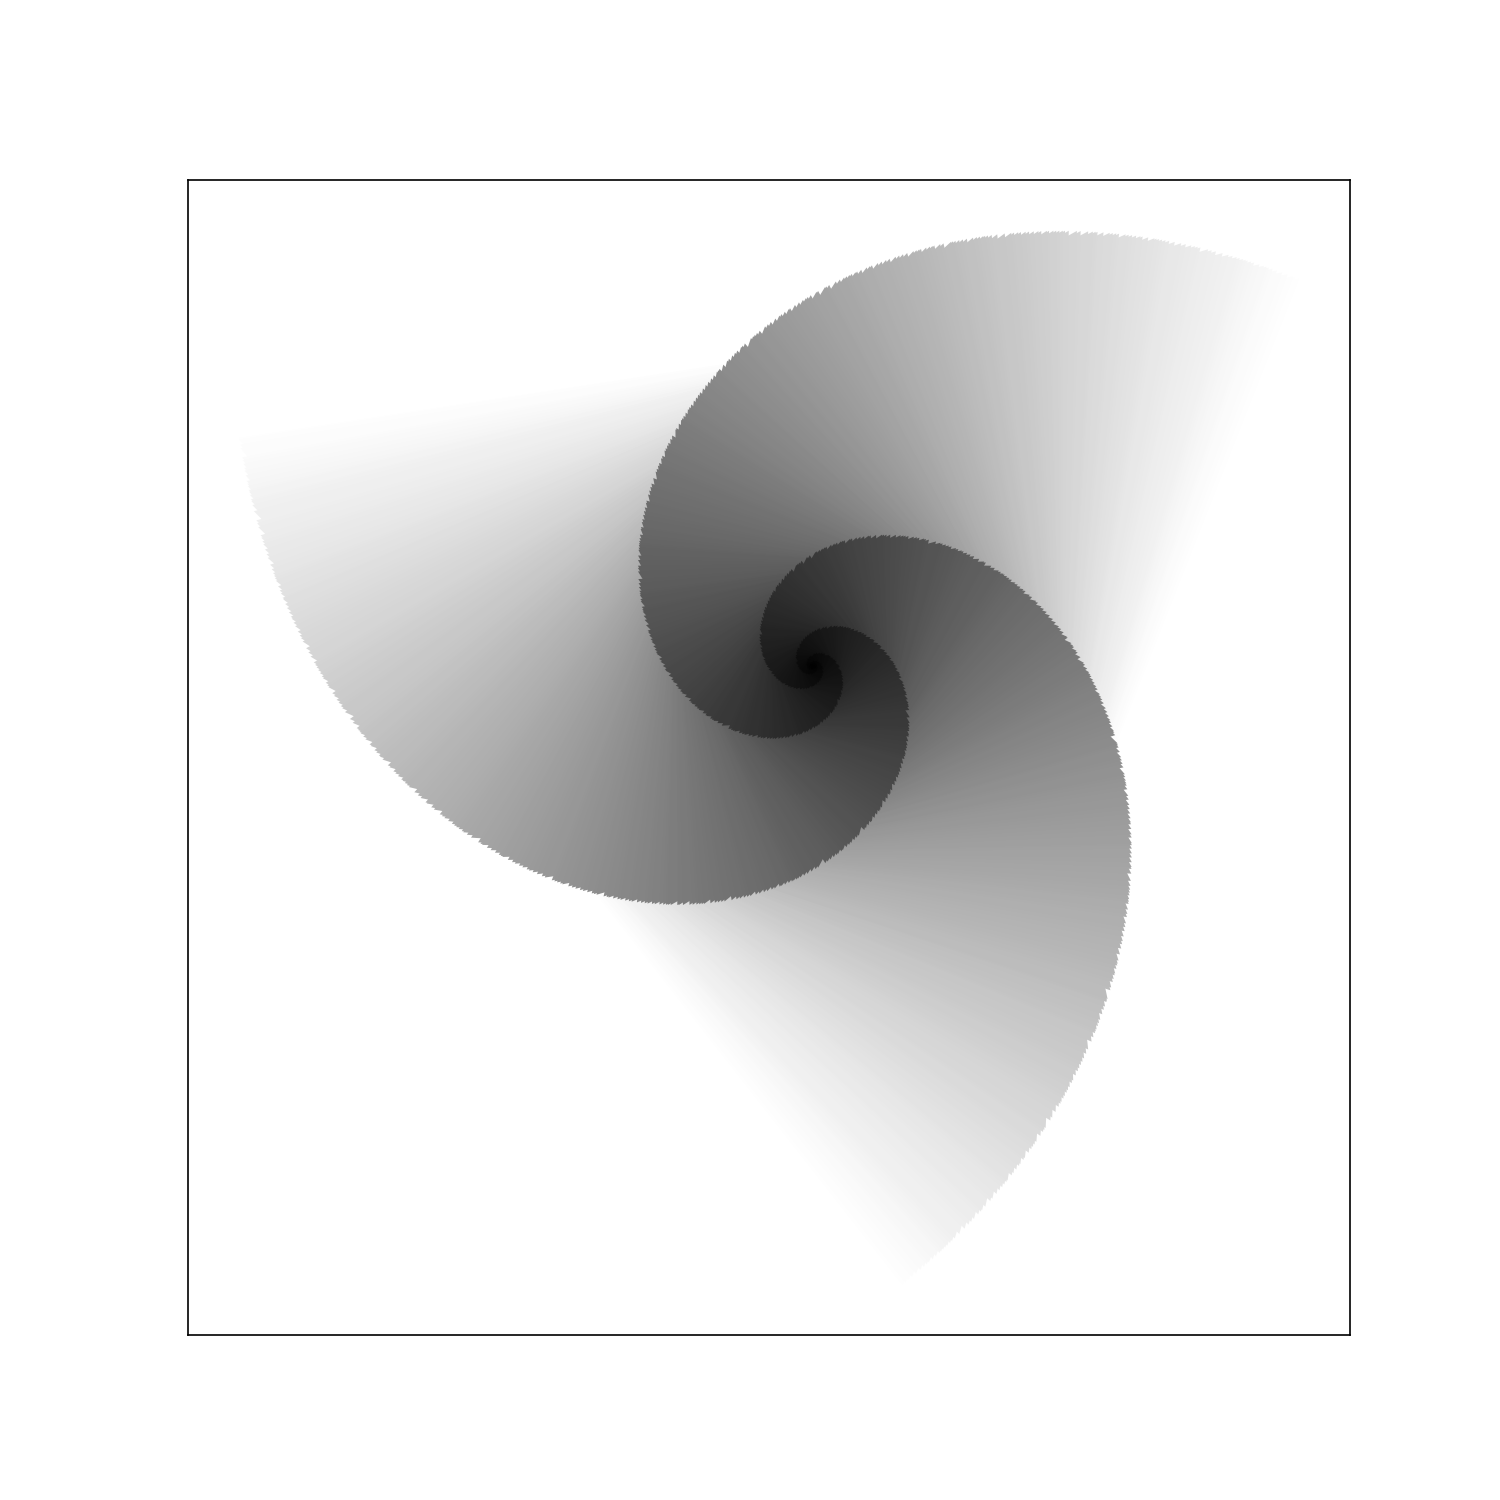

In [5]:
from ipywidgets import IntProgress
from datetime import datetime
from matplotlib import gridspec

def Rotx(l,rot):
    xr = [0*np.cos(rot)-0*np.sin(rot),(l[0])*np.cos(rot)-0*np.sin(rot),(x)*np.cos(rot)-y*np.sin(rot)]
    return xr

def Roty(l,rot):
    yr=[0*np.sin(rot)+0*np.cos(rot),(l[0])*np.sin(rot)+0*np.cos(rot),(x)*np.sin(rot)+y*np.cos(rot)]
    return yr


#Set the number of fibonacci triangles to display
n=1000

fig, ax1= plt1.subplots(figsize=(10, 10))

p= np.loadtxt("Primetable.txt", delimiter=",", unpack=False)
counter=np.arange(1,len(p)+1)

tempcount=np.arange(1,n)

ax1.clear()

rot=0
rot0=0
x0=[0,0,0]
y0=[0,0,0]

for i in tempcount:

    #Select 3 following primes
    l=p[(i-1):(i)+2]
    #print(l)

    #Determine triangle charesteristics (cosine rule)
    alpha=np.arccos((l[1]**2+l[2]**2-l[0]**2)/(2*l[1]*l[2]))
    beta=np.arccos((l[0]**2+l[2]**2-l[1]**2)/(2*l[0]*l[2]))
    gamma=np.arccos((l[0]**2+l[1]**2-l[2]**2)/(2*l[0]*l[1]))

    #Height Fibonacci Prime Triangle
    x=l[0]+l[1]*np.cos(np.pi-gamma)
    y=l[2]*np.cos(np.pi/2-beta)

    #Apply Rotation
    rot=rot+np.pi-rot0
    rot0=gamma
    xr=Rotx(l,rot)
    yr=Roty(l,rot)
    
    #Triangle not translation
    xr =xr+x0
    yr =yr+y0
    x0=x*np.cos(rot)-y*np.sin(rot)+x0
    y0=x*np.sin(rot)+y*np.cos(rot)+y0

    color=str(i/n)
    ax1.fill(xr,yr,zorder=(-i),c=color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
plt1.show()
#plt1.savefig('Fibonacci Prime Traingle', dpi=500, bbox_inches='tight')


    
    